### Exploring the landscap of the MSE function from beta distribution parameters

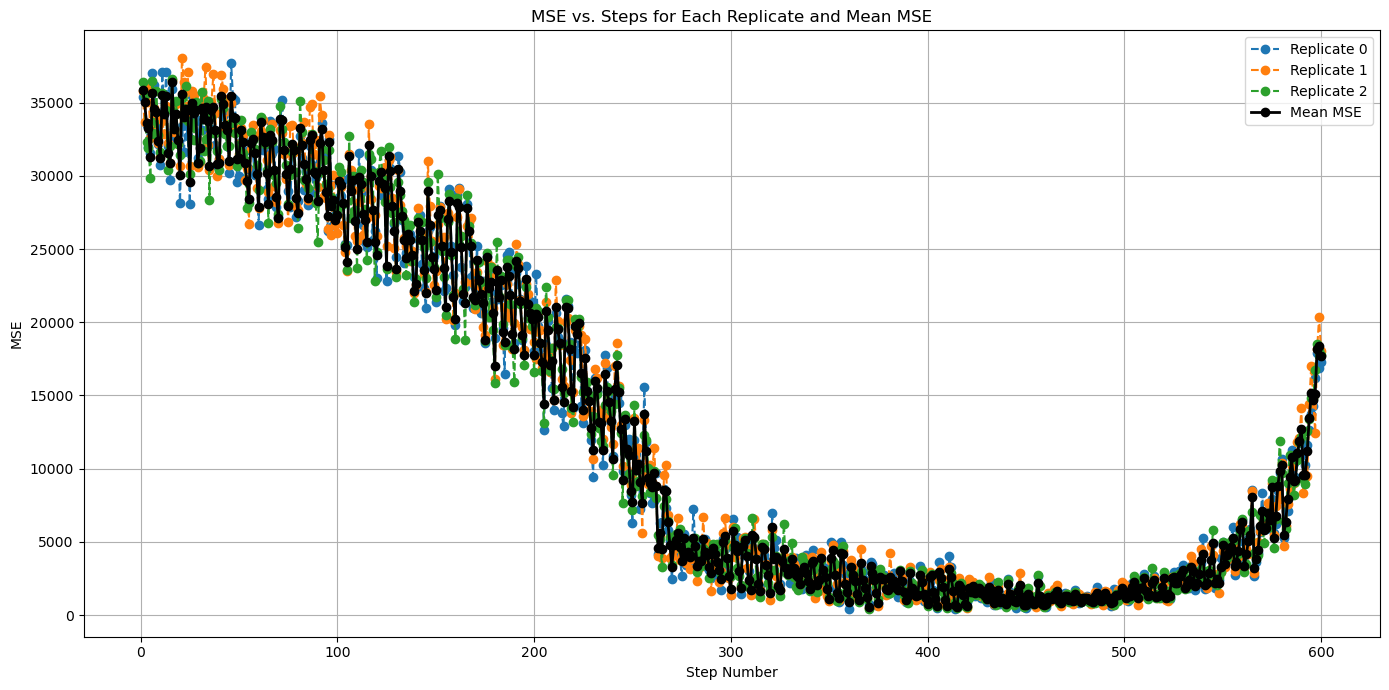

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
mse_data = pd.read_csv('MSE_params.csv')

# Each group of three rows represents a step with 3 replicates
# Create a 'step' column that increases every 3 rows
mse_data['step'] = (mse_data.index // 3) + 1

# Calculate the mean MSE for each step
step_mse_mean = mse_data.groupby('step')['MSE'].mean().reset_index()

# Plotting the mean MSE for each step
plt.figure(figsize=(14, 7))

# Plot each replicate's MSE
for rep in mse_data['rep'].unique():
    rep_data = mse_data[mse_data['rep'] == rep]
    plt.plot(rep_data['step'], rep_data['MSE'], marker='o', linestyle='--', label=f'Replicate {rep}')

# Plot the mean MSE line
plt.plot(step_mse_mean['step'], step_mse_mean['MSE'], marker='o', linestyle='-', color='black', linewidth=2, label='Mean MSE')

plt.title('MSE vs. Steps for Each Replicate and Mean MSE')
plt.xlabel('Step Number')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file (optional)
plt.savefig('mse_vs_steps_plot.pdf', format='pdf')

# Display the plot
plt.show()